In [1]:
#importing liberaries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

In [2]:
#load the dataset from my drive
data=pd.read_csv('C:/Users/Admin/Desktop/Data Minning/adult_WS4.csv')

In [3]:
#extract revelant columns
X = data[['age','education-num','hours-per-week']]

In [4]:
#Handle missing values presnet in the columns
X = X.dropna()

In [5]:
#standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
#K-Means Clustering
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

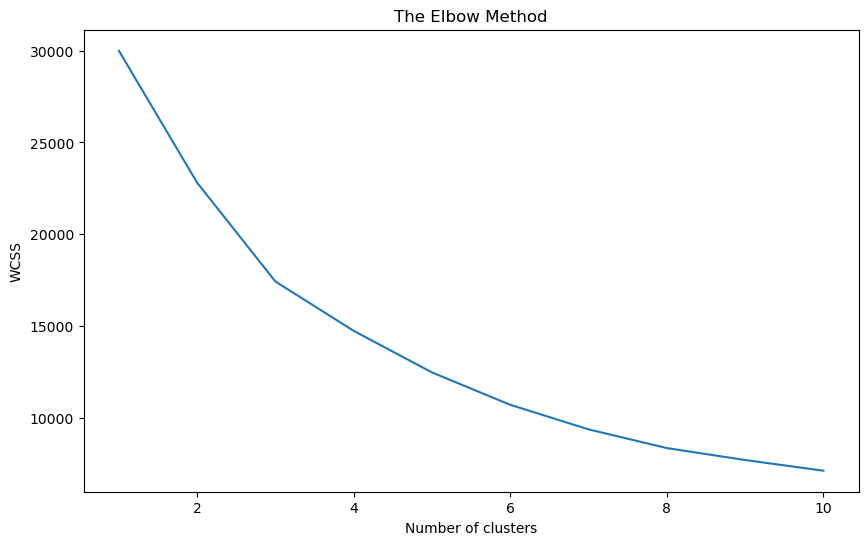

In [7]:
#plot the elbow curve to find the optimum number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
#choose the optimum number of clusters based on the elbow plot
k_opt = 3

In [9]:
#apply K-means clustering with the chosen number of clusters
kmeans =KMeans(n_clusters=k_opt, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


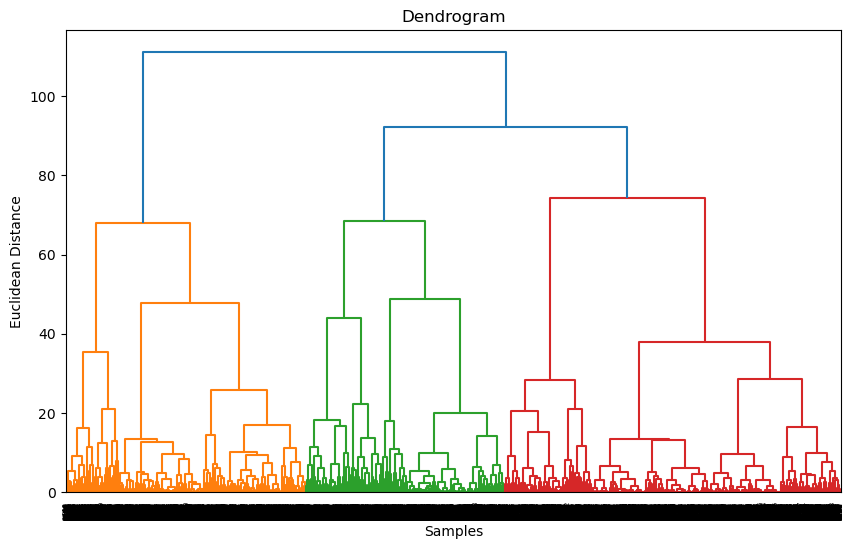

In [10]:
#Hierarchical Clustering
plt.figure(figsize=(10,6))
dend = shc.dendrogram(shc.linkage(X_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

In [11]:
#choosing the optimum number of cluster based on the dendrogram
h_opt= 3

In [12]:
#applying hierarchical clustering with the choosen number of clusters 
hclust = AgglomerativeClustering(n_clusters = h_opt)
y_hclust = hclust.fit_predict(X_scaled)

In [13]:
#import 3d library
from mpl_toolkits.mplot3d import Axes3D

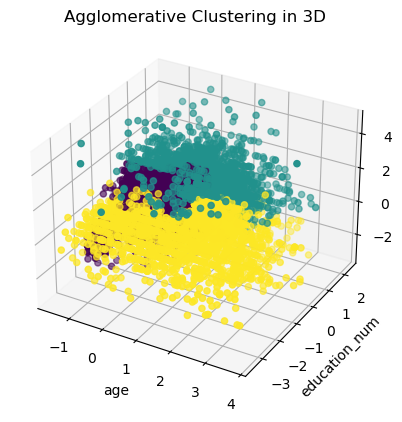

In [14]:
#Create an instance of AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters=h_opt)

# Fit the model and predict the cluster labels
y_hclust = hclust.fit_predict(X_scaled)

# Plotting the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_hclust, cmap='viridis', marker='o')

# Set labels and title
ax.set_xlabel('age')
ax.set_ylabel('education_num')
ax.set_zlabel('hours-per-week')
ax.set_title('Agglomerative Clustering in 3D')

# Show plot
plt.show()

In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [18]:
#Separate the target variable (income) from the feature
X = data.drop('income', axis=1)
y = data['income']

In [19]:
#Encode categorical variables
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race', 'sex', 'native-country']
encoders = {}
for col in cat_cols:
    encoders[col]= LabelEncoder()
    X[col] = encoders[col].fit_transform(X[col])

In [20]:
#Fill missing values with the mode
for col in X.columns:
    X[col] = X[col].fillna(X[col].mode()[0])

In [21]:
#Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
#Apply PCA with n_componests = 2
pca = PCA(n_components = 2)
X_pca = pca.fit_transform (X_scaled)

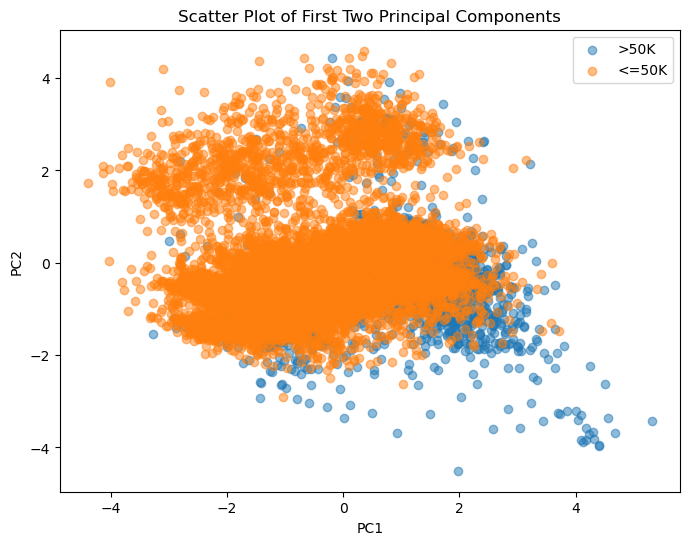

In [23]:
#Scatter plot for the two classes of the income column
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == '>50K', 0], X_pca[y == '>50K', 1], label='>50K', alpha=0.5)
plt.scatter(X_pca[y == '<=50K', 0], X_pca[y == '<=50K', 1], label='<=50K', alpha=0.5)
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()